## Final Project: Sales Analysis

In [1]:
# import necessary statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### Loading the sales data
For all these questions, we will be looking at the products in `sales_data.csv`.

In [2]:
df = pd.read_csv('sales_data.csv')
df.head()

,DATE,CUSTOMERID,STATE_CD,PRODUCT_GROUP,CUSTOMER_GROUP,PRODUCT_ID,CONTRACT_ID,SALES_TYPE,REVENUE,ORDER_QUANTITY,COST,UNIT_LIST_PRICE,CONTRACT_PRICE
0,08/14/23,Customer 332,NY,MPG 5,CG 82,Product 133,contract 39429,Special Rebate,103.28,17,21.76,11.0,6.08
1,02/21/23,Customer 1153,NY,MPG 5,CG 81,Product 134,contract 40135,Special Discount,498.10,170,239.91,11.0,2.93
2,07/21/23,Customer 861,NY,MPG 5,CG 58,Product 137,contract 39445,Special Rebate,13.74,2,9.42,19.0,6.87
3,03/30/23,Customer 922,OH,MPG 5,CG 18,Product 139,contract 39853,Special Rebate,5.33,1,4.83,19.0,5.33
4,06/06/23,Customer 749,AR,MPG 5,CG 101,Product 139,contract 39637,Special Discount,101.40,20,96.66,19.0,5.07


## 1. Profit Visualization

In [3]:
# Create a new column named PROFIT
df['PROFIT'] = df['REVENUE'] - df['COST']

# Convert the DATE column to datetime type
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y')

# Extract month and quarter from the DATE column
df['MONTH'] = df['DATE'].dt.to_period('M')
df['QUARTER'] = df['DATE'].dt.to_period('Q')

### 1.1 Monthly Profit

### Question 1: Create a monthly profit chart with the months on the x-axis and the profits on the y-axis. 

In which month does the highest profit occur? In which month does the lowest profit occur?

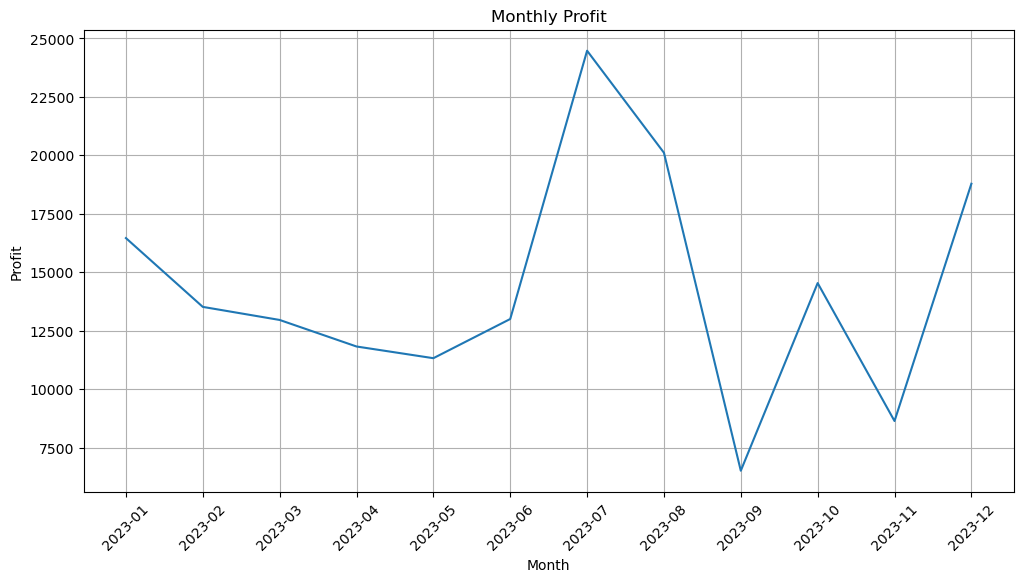

In [4]:
# Aggregate the data by month and calculate the total profit
monthly_profit = df.groupby('MONTH')['PROFIT'].sum().reset_index()

# Convert the 'MONTH' column to string format for plotting
monthly_profit['MONTH'] = monthly_profit['MONTH'].astype(str)

# Plot the monthly profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['MONTH'], monthly_profit['PROFIT'])
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The monthly profit follows a generally increasing trend over the given time period, starting from around 16,000 in 2023-01 and reaching over 18,750 by 2023-12. However, it is not consistently increasing every month: a significant dip in profit  was around 2023-09, and a sharp peak was around 2023-07.This indicates that the company's monthly profits are subject to some variability and potential seasonality effects, with the highest profits occurring in the middle of the year.

### 1.2 Quarterly Profit

### Question 2: Plot a quarterly profit line chart. What is the relationship between monthly profits and quarterly profits?

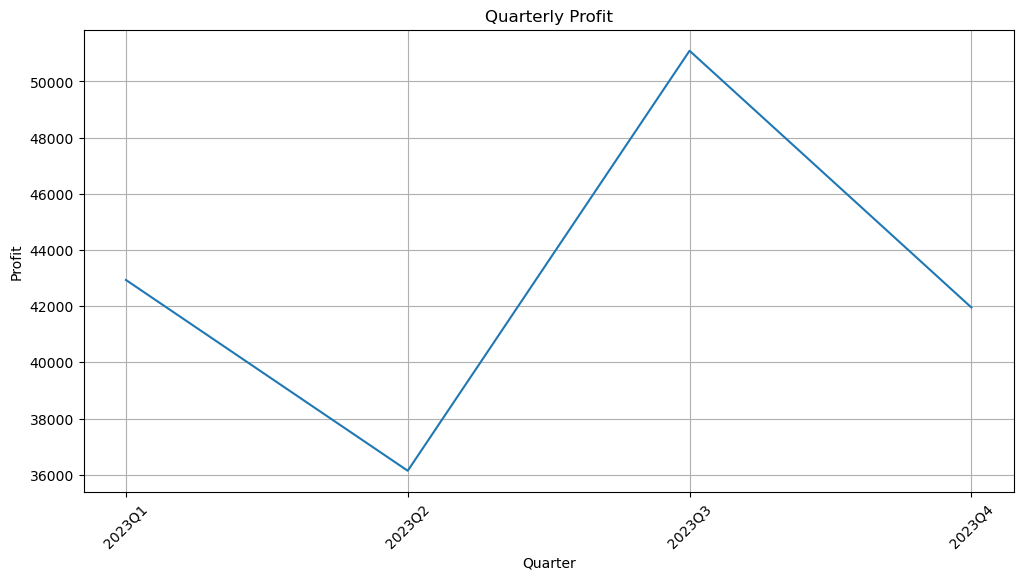

In [5]:
# Aggregate the data by quarter and calculate the total profit
quarterly_profit = df.groupby('QUARTER')['PROFIT'].sum().reset_index()

# Convert the 'QUARTER' column to string format for plotting
quarterly_profit['QUARTER'] = quarterly_profit['QUARTER'].astype(str)

# Plot the quarterly profit
plt.figure(figsize=(12, 6))
plt.plot(quarterly_profit['QUARTER'], quarterly_profit['PROFIT'])
plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Quarterly Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The trend in quarterly profits closely mirrors the trend observed in the monthly profit graph.The highest quarterly profit is indeed in the second quarter, which aligns with the highest monthly profits occurring in July and August. This suggests that the company's peak performance is concentrated in the middle of the year.

## 2. Geographical Analysis

### Question 3: What are the top 10 states with the highest sales revenue?

In [6]:
# Group the data by state and calculate the total revenue for each state
state_revenue = df.groupby('STATE_CD')['REVENUE'].sum().reset_index()

# Sort the states by revenue in descending order
state_revenue = state_revenue.sort_values('REVENUE', ascending=False)
state_revenue.head(10)

,STATE_CD,REVENUE
4,CO,91484.07
7,FL,87578.68
36,TX,67921.37
8,GA,48353.94
35,TN,24779.43
23,NC,22246.91
32,PA,21773.08
19,MN,19899.27
15,LA,18878.03
33,SC,18518.81


### Question 4: What is the product ID with the most order quantity in the state that brings the most profit?

In [7]:
# Calculate profit for each state
state_profit = df.groupby('STATE_CD').agg({'REVENUE': 'sum', 'COST': 'sum'}).reset_index()
state_profit['PROFIT'] = state_profit['REVENUE'] - state_profit['COST']

# Sort states by profit in descending order
state_profit = state_profit.sort_values('PROFIT', ascending=False)

# Get the state with the most profit
most_profitable_state = state_profit.iloc[0]['STATE_CD']
most_profitable_state

'CO'

Colorado brings the most profit.

In [8]:
# Filter data for the most profitable state
state_data = df[df['STATE_CD'] == most_profitable_state]

# Group by product ID and calculate total order quantity
product_quantity = state_data.groupby('PRODUCT_ID')['ORDER_QUANTITY'].sum().reset_index()

# Sort products by order quantity in descending order
product_quantity = product_quantity.sort_values('ORDER_QUANTITY', ascending=False)

# Get the product ID with the most order quantity
most_ordered_product = product_quantity.iloc[0]['PRODUCT_ID']
most_ordered_product

'Product 5014'

In Colorado, Product 5014 has the most order quantity.

### Question 5: Find the correlation between STATE_CD and COST.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame to avoid modifying it
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'STATE_CD' column
df_encoded['STATE_CD_ENCODED'] = le.fit_transform(df_encoded['STATE_CD'])

# Calculate the correlation between 'STATE_CD_ENCODED' and 'COST'
correlation = df_encoded['STATE_CD_ENCODED'].corr(df_encoded['COST'])

print(f"Correlation between 'STATE_CD' and 'COST': {correlation}")

Correlation between 'STATE_CD' and 'COST': -0.09920098925078161


## 3. Unique Product

### Question 6: How many unique products are there?

In [10]:
unique_product_ids = df['PRODUCT_ID'].nunique()
unique_product_ids

194

### Question 7: What is the profit for each unique product ID? Sort in descending order by profit.

In [11]:
# Calculate the profit of each unique product ID
product_profit = df.groupby('PRODUCT_ID')['PROFIT'].sum().reset_index()

# Sort the product profit in descending order
product_profit = product_profit.sort_values('PROFIT', ascending=False)
product_profit

,PRODUCT_ID,PROFIT
111,Product 4925,43721.01
110,Product 4921,43052.24
104,Product 4905,22999.43
106,Product 4909,17185.45
79,Product 4552,5034.74
...,...,...
149,Product 5073,-2243.57
168,Product 5153,-2765.30
154,Product 5087,-3036.43
157,Product 5096,-3334.60


There are 194 unique product. But some products have **negative margins**.

### Question 8: How many products have positive profit?

In [12]:
positive_profit_count = (product_profit['PROFIT'] > 0).sum()
positive_profit_count

159

### Question 9: Which product is the profit champion?

In [13]:
# Filter the products with positive profit
positive_profit_products = product_profit[product_profit['PROFIT'] > 0]

# Sort the positive profit products in descending order
positive_profit_products = positive_profit_products.sort_values('PROFIT', ascending=False)

profit_champion = positive_profit_products.iloc[0]
profit_champion

PRODUCT_ID    Product 4925
PROFIT            43721.01
Name: 111, dtype: object

**Product 4925** is the profit champion.

### Question 10: Create a profit chart of all products with positive profits. 
The x-axis is the product ID and the y-axis is the profit.

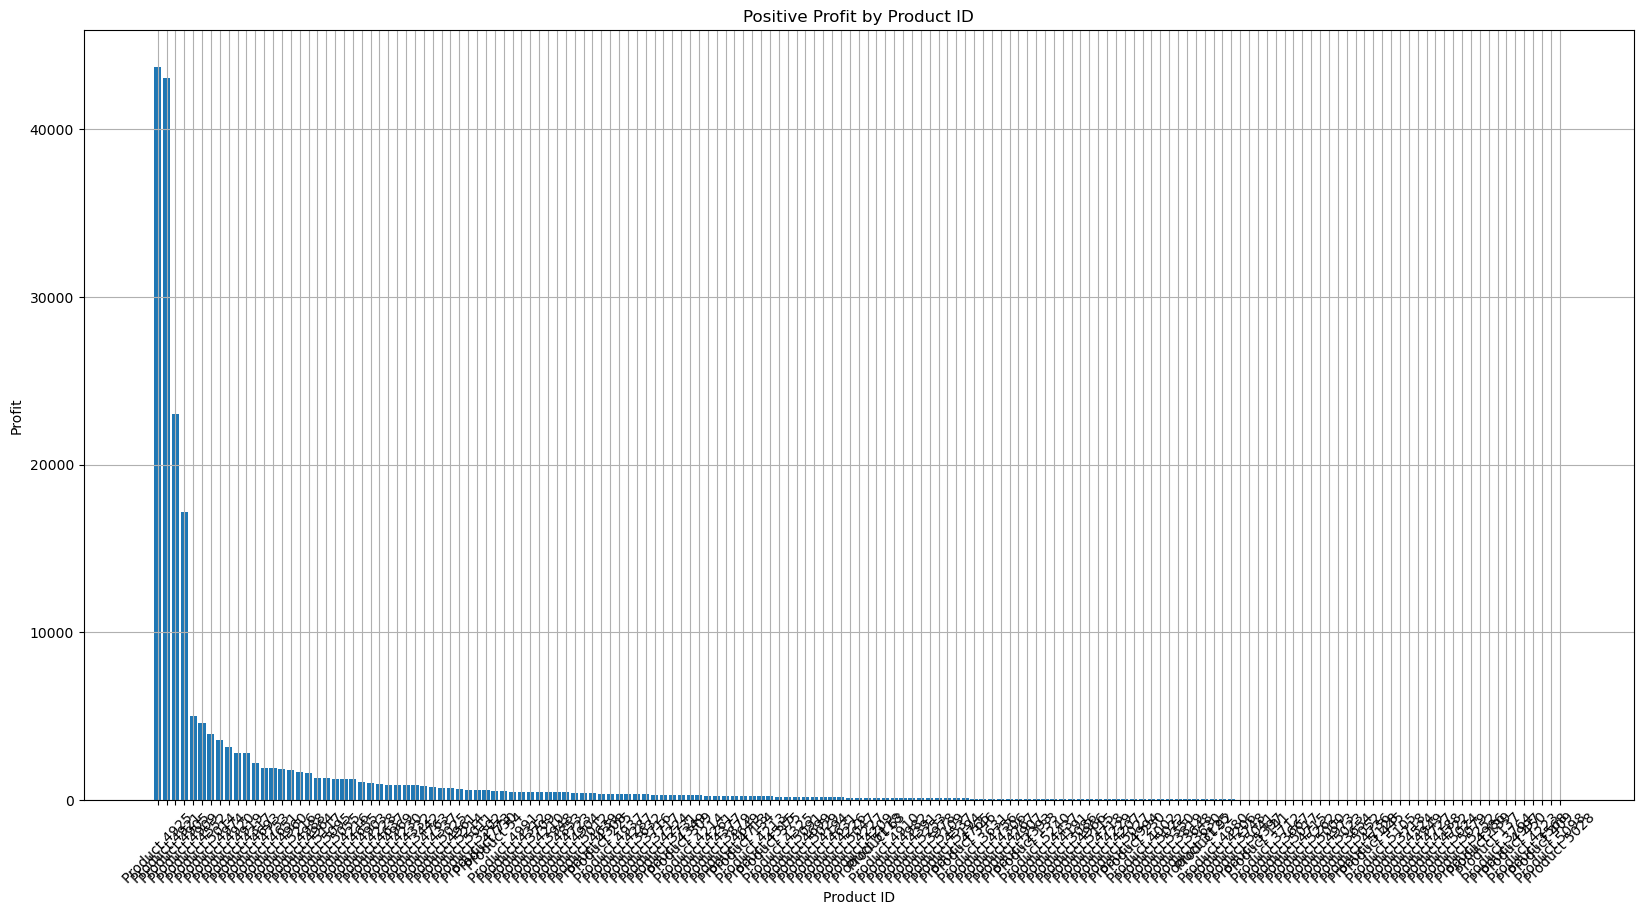

In [14]:
# Create a bar chart of positive profit products
plt.figure(figsize=(20, 10))
plt.bar(positive_profit_products['PRODUCT_ID'], positive_profit_products['PROFIT'])
plt.xlabel('Product ID')
plt.ylabel('Profit')
plt.title('Positive Profit by Product ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We noticed that there is a long tail in the graph. It indicates that there are numerous products with relatively low profit contributions. The tail extends far to the right, suggesting that a significant portion of the product portfolio generates minimal profits individually, but collectively, they may still contribute to the overall profitability.

Given the significant profit contributions of the top products, it would be wise to prioritize and allocate resources to further promote and optimize these products. **Therefore, the following analysis will focus on the profit champion product: Product 4925.**

## 4. Profit Champion: Product 4925

### 4.1 Product Group

### Question 11: To which product group does product 4925 belong?

In [15]:
# Find the PRODUCT_GROUP for Product 4925
product_group = df[df['PRODUCT_ID'] == 'Product 4925']['PRODUCT_GROUP'].iloc[0]
product_group

'MPG 11'

Product 4925 belongs to MPG 11.

### 4.2 Monthly Profit

### Question 12: Which month has the lowest profit for product 4925?

In [16]:
# Calculate the monthly profit of Product 4925
product_4925_profit = df[df['PRODUCT_ID'] == 'Product 4925'].copy()
product_4925_profit['DATE'] = pd.to_datetime(product_4925_profit['DATE'], format='%m/%d/%y')
product_4925_profit['MONTH'] = product_4925_profit['DATE'].dt.to_period('M')

monthly_profit_4925 = product_4925_profit.groupby('MONTH')['PROFIT'].sum().reset_index()
monthly_profit_4925 = monthly_profit_4925.sort_values('PROFIT')

profit_loser_4925 = monthly_profit_4925.iloc[0]
profit_loser_4925

MONTH     2023-09
PROFIT      36.38
Name: 8, dtype: object

Product 4925 reached bottom profits in Sep.

### 4.3 Customer ID

### Question 13: Which customer purchases product 4925 the most?

In [17]:
# Find unique Customer IDs who purchased Product 4925 and the number of times they purchased it
customer_purchases_4925 = df[df['PRODUCT_ID'] == 'Product 4925'].groupby('CUSTOMERID').size().reset_index(name='PURCHASE_COUNT')
customer_purchases_4925 = customer_purchases_4925.sort_values('PURCHASE_COUNT', ascending=False)
print(customer_purchases_4925)

max_pruchase_customer = customer_purchases_4925.iloc[0]
max_pruchase_customer

       CUSTOMERID  PURCHASE_COUNT
14   Customer 928               5
8    Customer 818               3
13   Customer 890               2
12   Customer 873               2
11   Customer 864               2
10   Customer 829               2
9    Customer 823               1
15   Customer 948               1
0   Customer 1003               1
1   Customer 1036               1
7    Customer 419               1
6     Customer 16               1
5    Customer 149               1
4   Customer 1406               1
3   Customer 1140               1
2    Customer 105               1
16   Customer 963               1


CUSTOMERID        Customer 928
PURCHASE_COUNT               5
Name: 14, dtype: object

Customer 928 has made the most purchases.

### Question 14: Which customer purchased the largest quantity of product 4925?

In [18]:
customer_quantity_4925 = df[df['PRODUCT_ID'] == 'Product 4925'].groupby('CUSTOMERID')['ORDER_QUANTITY'].sum().reset_index()
customer_quantity_4925

,CUSTOMERID,ORDER_QUANTITY
0,Customer 1003,72
1,Customer 1036,106
2,Customer 105,284
3,Customer 1140,2
4,Customer 1406,193
5,Customer 149,55
6,Customer 16,18
7,Customer 419,26
8,Customer 818,812
9,Customer 823,6


In [19]:
# Find the customer who purchased the largest quantity of Product 4925
max_quantity_customer = customer_quantity_4925.loc[customer_quantity_4925['ORDER_QUANTITY'].idxmax(), 'CUSTOMERID']
max_quantity = customer_quantity_4925['ORDER_QUANTITY'].max()
print(max_quantity_customer)
print(max_quantity)

Customer 818
812


Customer 818 purchased the largest quantity of Product 4925.

### Question 15: Which customer brings the most profit to Product 4925?

In [20]:
customer_profit_4925 = df[df['PRODUCT_ID'] == 'Product 4925'].groupby('CUSTOMERID')['PROFIT'].sum().reset_index()
customer_profit_4925

,CUSTOMERID,PROFIT
0,Customer 1003,997.98
1,Customer 1036,972.09
2,Customer 105,3467.91
3,Customer 1140,36.38
4,Customer 1406,3148.09
5,Customer 149,898.76
6,Customer 16,448.75
7,Customer 419,316.45
8,Customer 818,9251.24
9,Customer 823,72.25


In [21]:
# Find the customer ID with the highest profit for Product 4925
max_profit_customer = customer_profit_4925.loc[customer_profit_4925['PROFIT'].idxmax(), 'CUSTOMERID']
max_profit = customer_profit_4925['PROFIT'].max()
print(max_profit_customer)
print(max_profit)

Customer 864
10342.23


Customer 864 brings the highest profit (10342.23) for Product 4925.

### 4.4 Customer Group

### Question 16: Which customer group does the customer who purchased the largest quantity of product 4925 come from?

In [22]:
# Find the CUSTOMER_GROUP for the customer who purchased the largest quantity of Product 4925
customer_group_max_quantity = df[(df['PRODUCT_ID'] == 'Product 4925') & (df['CUSTOMERID'] == max_quantity_customer)]['CUSTOMER_GROUP'].iloc[0]
customer_group_max_quantity

'CG 4'

Customer 818 belongs to CUSTOMER_GROUP: CG 4.

### Question 17: Which customer group does the customer that brings the most profit to Product 4925 belong to?

In [23]:
# Find the CUSTOMER_GROUP for the customer who brought the most profit for Product 4925
customer_group_max_profit = df[(df['PRODUCT_ID'] == 'Product 4925') & (df['CUSTOMERID'] == max_profit_customer)]['CUSTOMER_GROUP'].iloc[0]
customer_group_max_profit

'CG 10'

Customer 864 belongs to CUSTOMER_GROUP: CG 10.

### 4.5 Sales Type

### Question 18: What is the sales type og Product 4925?

In [24]:
# Find the SALES_TYPE of Product 4925
sales_type = df[df['PRODUCT_ID'] == 'Product 4925']['SALES_TYPE']
sales_type

299    Special Rebate
300    Special Rebate
301    Special Rebate
302    Special Rebate
303    Special Rebate
304    Special Rebate
305    Special Rebate
306    Special Rebate
307    Special Rebate
308    Special Rebate
309    Special Rebate
310    Special Rebate
311    Special Rebate
312    Special Rebate
313    Special Rebate
314    Special Rebate
315    Special Rebate
316    Special Rebate
317    Special Rebate
318    Special Rebate
319    Special Rebate
320    Special Rebate
321    Special Rebate
322    Special Rebate
323    Special Rebate
324    Special Rebate
325    Special Rebate
Name: SALES_TYPE, dtype: object

The sales type of Product 4925 is: Special Rebate.

### 4.6 Price Elasticity of Demand

### Question 19: Calculate the price point elasticity of demand for product 4925.

In [25]:
# Filter the dataset for Product 4925
product_4925_data = df[df['PRODUCT_ID'] == 'Product 4925']

# Extract the 'ORDER_QUANTITY' and 'CONTRACT_PRICE' columns
quantity = product_4925_data['ORDER_QUANTITY'].values
price = product_4925_data['CONTRACT_PRICE'].values

# Calculate the percentage change in quantity and price
quantity_change = [(quantity[i] - quantity[i-1]) / quantity[i-1] for i in range(1, len(quantity))]
price_change = [(price[i] - price[i-1]) / price[i-1] for i in range(1, len(price))]

# Compute the price elasticity of demand
elasticity = [quantity_change[i] / price_change[i] for i in range(len(quantity_change))]

for i in range(len(elasticity)):
    print(f"Data Point {i+1}:")
    print(f"Price: {price[i]:.2f}, Quantity: {quantity[i]}")
    print(f"Price Change: {price_change[i]:.2%}, Quantity Change: {quantity_change[i]:.2%}")
    print(f"Price Elasticity of Demand: {elasticity[i]:.2f}")
    print()

Data Point 1:
Price: 35.12, Quantity: 55
Price Change: -7.77%, Quantity Change: -27.27%
Price Elasticity of Demand: 3.51

Data Point 2:
Price: 32.39, Quantity: 40
Price Change: -1.36%, Quantity Change: 225.00%
Price Elasticity of Demand: -165.63

Data Point 3:
Price: 31.95, Quantity: 130
Price Change: 13.99%, Quantity Change: -74.62%
Price Elasticity of Demand: -5.33

Data Point 4:
Price: 36.42, Quantity: 33
Price Change: -3.24%, Quantity Change: -54.55%
Price Elasticity of Demand: 16.84

Data Point 5:
Price: 35.24, Quantity: 15
Price Change: 0.00%, Quantity Change: -66.67%
Price Elasticity of Demand: -inf

Data Point 6:
Price: 35.24, Quantity: 5
Price Change: -7.38%, Quantity Change: 1340.00%
Price Elasticity of Demand: -181.62

Data Point 7:
Price: 32.64, Quantity: 72
Price Change: 10.39%, Quantity Change: -80.56%
Price Elasticity of Demand: -7.76

Data Point 8:
Price: 36.03, Quantity: 14
Price Change: 2.61%, Quantity Change: -85.71%
Price Elasticity of Demand: -32.85

Data Point 9:


/var/folders/53/3g2fl8m139q5qnmc4rzlrrkh0000gn/T/ipykernel_44981/3387328735.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  elasticity = [quantity_change[i] / price_change[i] for i in range(len(quantity_change))]


### Question 20: Use the OLS regression method to calculate the price elasticity of demand for product 4925.

In [26]:
# Create Log Transformed Variables
product_4925_data['LN_PRICE'] = np.log(product_4925_data['CONTRACT_PRICE'])
product_4925_data['LN_QUANTITY'] = np.log(product_4925_data['ORDER_QUANTITY'])

/var/folders/53/3g2fl8m139q5qnmc4rzlrrkh0000gn/T/ipykernel_44981/2627891630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_4925_data['LN_PRICE'] = np.log(product_4925_data['CONTRACT_PRICE'])
/var/folders/53/3g2fl8m139q5qnmc4rzlrrkh0000gn/T/ipykernel_44981/2627891630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_4925_data['LN_QUANTITY'] = np.log(product_4925_data['ORDER_QUANTITY'])


In [27]:
# Select the relevant variables for regression
X = product_4925_data[['LN_PRICE']]

# Add a constant term to the independent variables
X = sm.add_constant(X, prepend = False)

# Define the dependent variable
y = product_4925_data['LN_QUANTITY']

# Run the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LN_QUANTITY   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.939
Date:                Wed, 15 May 2024   Prob (F-statistic):             0.0583
Time:                        14:24:37   Log-Likelihood:                -46.333
No. Observations:                  27   AIC:                             96.67
Df Residuals:                      25   BIC:                             99.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LN_PRICE      -5.9957      3.021     -1.985      0.0

So, the price elasticity of demand is -5.9957. This comes from the ANOVA table above and is the estimated coefficient of LN_PRICE regressed on LN_QUANTITY.

**A 1% increase in price will lower the quantity sold by 5.9957%.**

### 4.7 Price Elasticity of Revenue

### Question 21: Use the OLS regression method to calculate the price elasticity of revenue for product 4925.

In [28]:
product_4925_data['LN_REVENUE'] = np.log(product_4925_data['REVENUE'])

/var/folders/53/3g2fl8m139q5qnmc4rzlrrkh0000gn/T/ipykernel_44981/416045906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_4925_data['LN_REVENUE'] = np.log(product_4925_data['REVENUE'])


In [29]:
# Select the relevant variables for regression
L = product_4925_data[['LN_PRICE']]

# Add a constant term to the independent variables
L = sm.add_constant(L, prepend = False)

# Define the dependent variable
K = product_4925_data['LN_REVENUE']

# Run the OLS regression
model1 = sm.OLS(K, L)
results1 = model1.fit()

# Print the regression results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:             LN_REVENUE   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.735
Date:                Wed, 15 May 2024   Prob (F-statistic):              0.111
Time:                        14:24:37   Log-Likelihood:                -46.333
No. Observations:                  27   AIC:                             96.67
Df Residuals:                      25   BIC:                             99.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LN_PRICE      -4.9957      3.021     -1.654      0.1

So, the price elasticity of revenue is -4.9957. This comes from the ANOVA table above and is the estimated coefficient of LN_PRICE regressed on LN_REVENUE.

**A 1% increase in price will lower the revenue by 4.9957%.**